<h1 style="font-weight:600;">Задание 2</h1>

<p style="font-weight:600;">ВИЗУАЛЬНЫЙ АНАЛИЗ ДАННЫХ</p>

<p><span style="font-weight:600;">Цель работы:</span> изучить программные средства, используемые для визуализации
наборов данных.</p>

<p>Набор данных содержит информацию о донорах и выполненных ими трансфу-
зиях до марта 2007 г. включительно. Целью исследования является построение про-
гноза сдачи донором крови в марте 2007 г. Полученный результат позволяет оценить

вероятность посещения донором центра сдачи крови в дальнейшем и относится к за-
дачам бинарной классификации. В исследовании используется база данных доноров

медицинского центра города Синьчжу на Тайване. Из базы данных медицинского цен-
тра случайным образом были выбраны 748 доноров для анализа.</p>

<p style="font-weight:600;">Атрибуты:</p>
<ul>
<li>Recency – количество месяцев с момента последней сдачи крови донором;</li>
<li>Frequency – общее количество трансфузий донора;</li>
<li>Monetary – количество сданной донором крови в куб. см;</li>
<li>Time – количество месяцев с момента первого донорства;</li>
<li>Class – целевая переменная прогноза трансфузии.</li>
</ul>

<p style="font-weight:600;">1. Импортируем необходимые библиотеки</p>

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

<p style="font-weight:600;">2. Импортируем набор данных из файла blood.csv и поместим его в объект DataFrame</p>

In [6]:
data = pd.read_csv("blood.csv")
data.head

<bound method NDFrame.head of      Recency  Frequency  Monetary  Time  Class
0          2         50     12500    98      1
1          0         13      3250    28      1
2          1         16      4000    35      1
3          2         20      5000    45      1
4          1         24      6000    77      0
..       ...        ...       ...   ...    ...
743       23          2       500    38      0
744       21          2       500    52      0
745       23          3       750    62      0
746       39          1       250    39      0
747       72          1       250    72      0

[748 rows x 5 columns]>

<p style="font-weight:600;">3. Получим сводную информацю по датафрейму</p>

In [7]:
data.info

<bound method DataFrame.info of      Recency  Frequency  Monetary  Time  Class
0          2         50     12500    98      1
1          0         13      3250    28      1
2          1         16      4000    35      1
3          2         20      5000    45      1
4          1         24      6000    77      0
..       ...        ...       ...   ...    ...
743       23          2       500    38      0
744       21          2       500    52      0
745       23          3       750    62      0
746       39          1       250    39      0
747       72          1       250    72      0

[748 rows x 5 columns]>

<p style="font-weight:600;">4. Визуализация количественных признаков</p>

<Axes: >

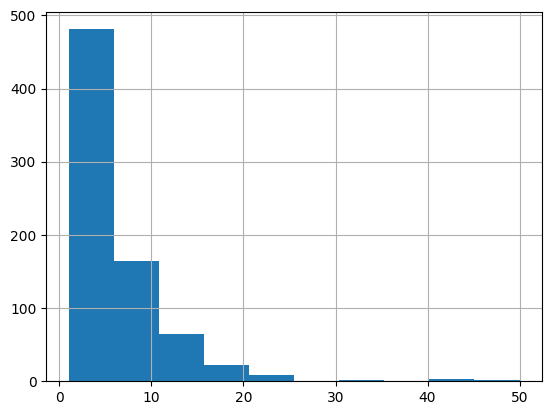

In [17]:
data["Frequency"].hist()

<span style="font-weight:500; font-size:14px;">
Изменим размер фигуры и применим метод hist() для визуализации распределения нескольких признаков</span>

array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

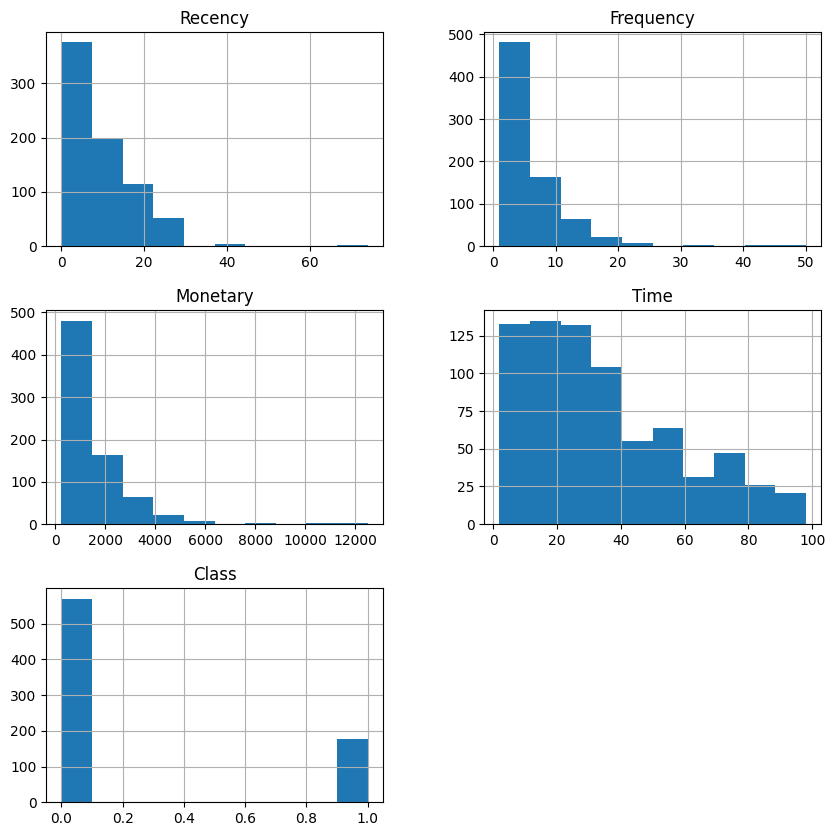

In [18]:
data.hist(figsize=(10,10))

<span style="font-weight:500; font-size:14px;">Подобный график можно получить с использованием matplotlib</span>

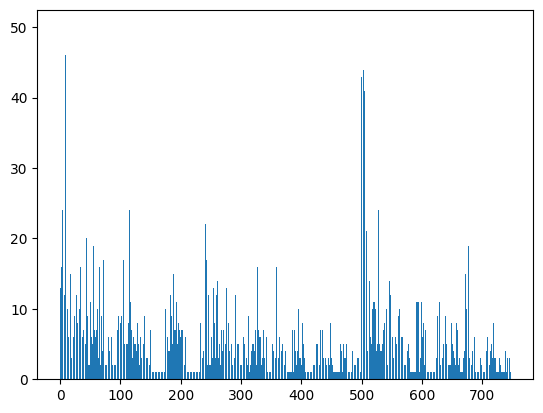

In [23]:
plt.bar(data.index, data["Frequency"])
plt.show()

<BarContainer object of 33 artists>

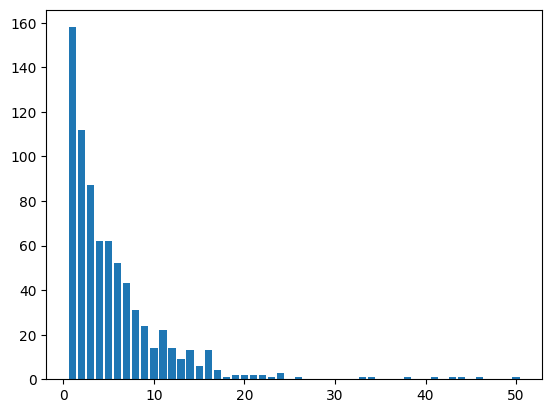

In [24]:
hist = data["Frequency"].value_counts()
plt.bar(hist.index, hist)

<Axes: ylabel='Frequency'>

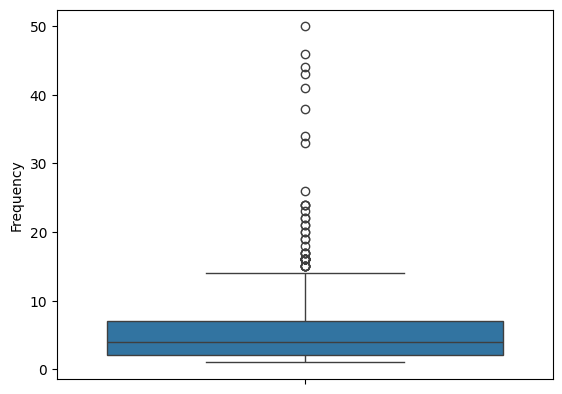

In [25]:
sns.boxplot(data["Frequency"])

<span style="font-weight:500; font-size:14px;">Ниже представлен код и результат построения графиков для анализа объёма сданной крови (Monetary) в зависимости от того, сдавал ли донор кровь в марте 2007 года</span>

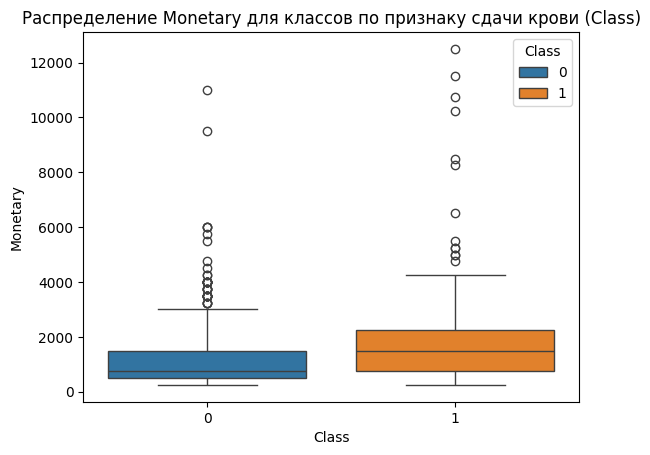

In [26]:
top_data = data[["Class", "Monetary"]]
top_data = top_data.groupby("Class").sum()
top_data = top_data.sort_values("Monetary", ascending=False)
top_data = top_data[:2].index.values

# Строим boxplot для выбранных классов
sns.boxplot(
    x="Class",
    y="Monetary",
    data=data[data.Class.isin(top_data)],
    hue="Class"
)
plt.title("Распределение Monetary для классов по признаку сдачи крови (Class)")
plt.show()

<p style="font-weight:600;">5. Визуализация категориальных признаков</p>

<span style="font-weight:500; font-size:14px;">Типичным категориальным признаком в анализируемом наборе данных является признак «Class», который показывает, сдавал ли донор кровь в марте 2007 года.</span>

In [27]:
data["Class"].value_counts()

Class
0    570
1    178
Name: count, dtype: int64

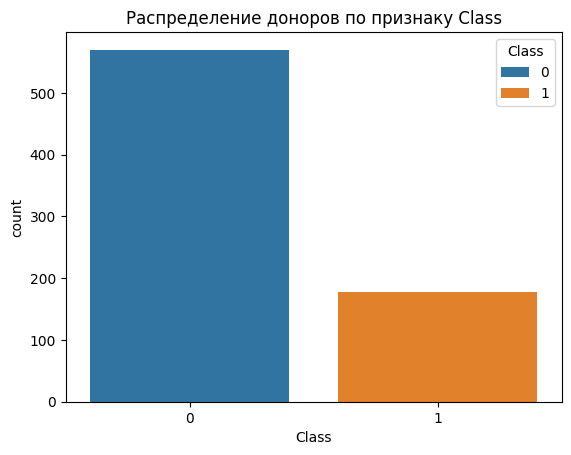

In [28]:
sns.countplot(data=data, x="Class", hue="Class")
plt.title("Распределение доноров по признаку Class")
plt.show()

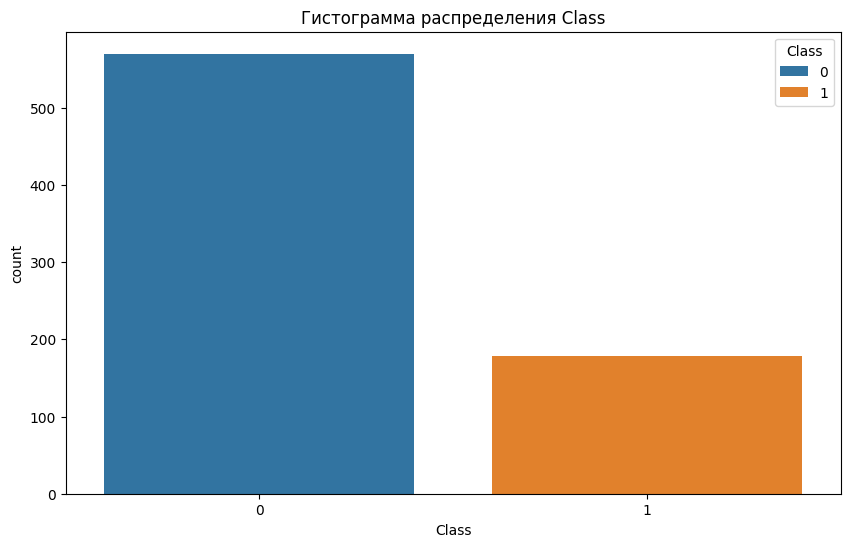

In [29]:
# Гистограмма для категориального признака Class (все категории)
fig = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x="Class", hue="Class")
plt.title("Гистограмма распределения Class")
plt.show()

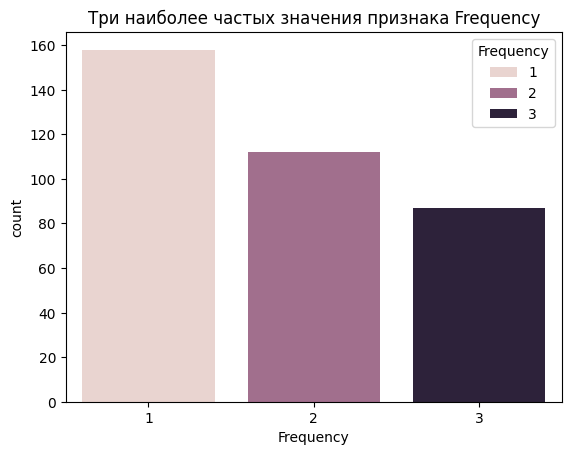

In [30]:
#Гистограмма трёх самых частых категорий по признаку Frequency
top_freq = data["Frequency"].value_counts().head(3).index

sns.countplot(
    data=data[data["Frequency"].isin(top_freq)],
    x="Frequency",
    hue="Frequency"
)
plt.title("Три наиболее частых значения признака Frequency")
plt.show()

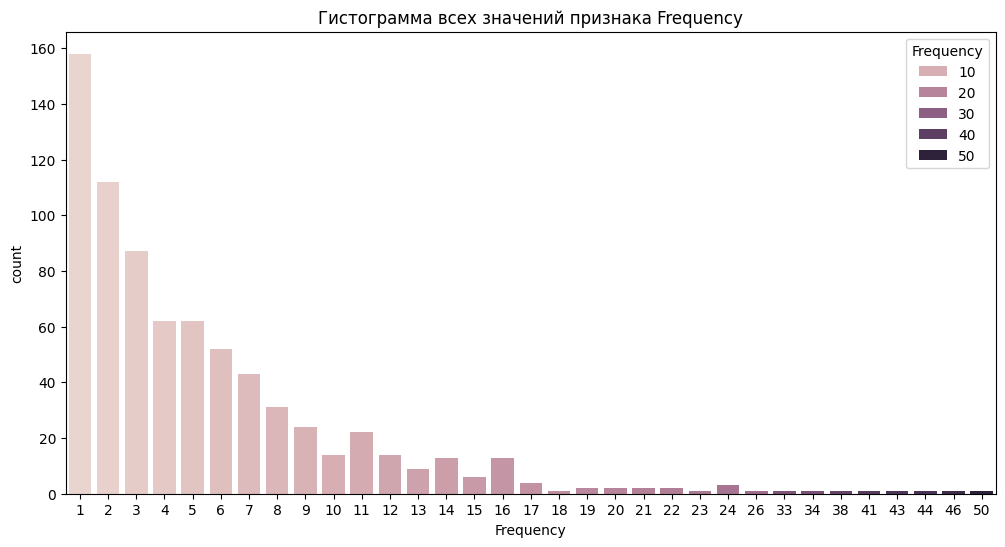

In [31]:
#Гистограмма для всех категорий частоты сдач крови (Frequency)
fig = plt.subplots(figsize=(12, 6))
sns.countplot(data=data, x="Frequency", hue="Frequency")
plt.title("Гистограмма всех значений признака Frequency")
plt.show()

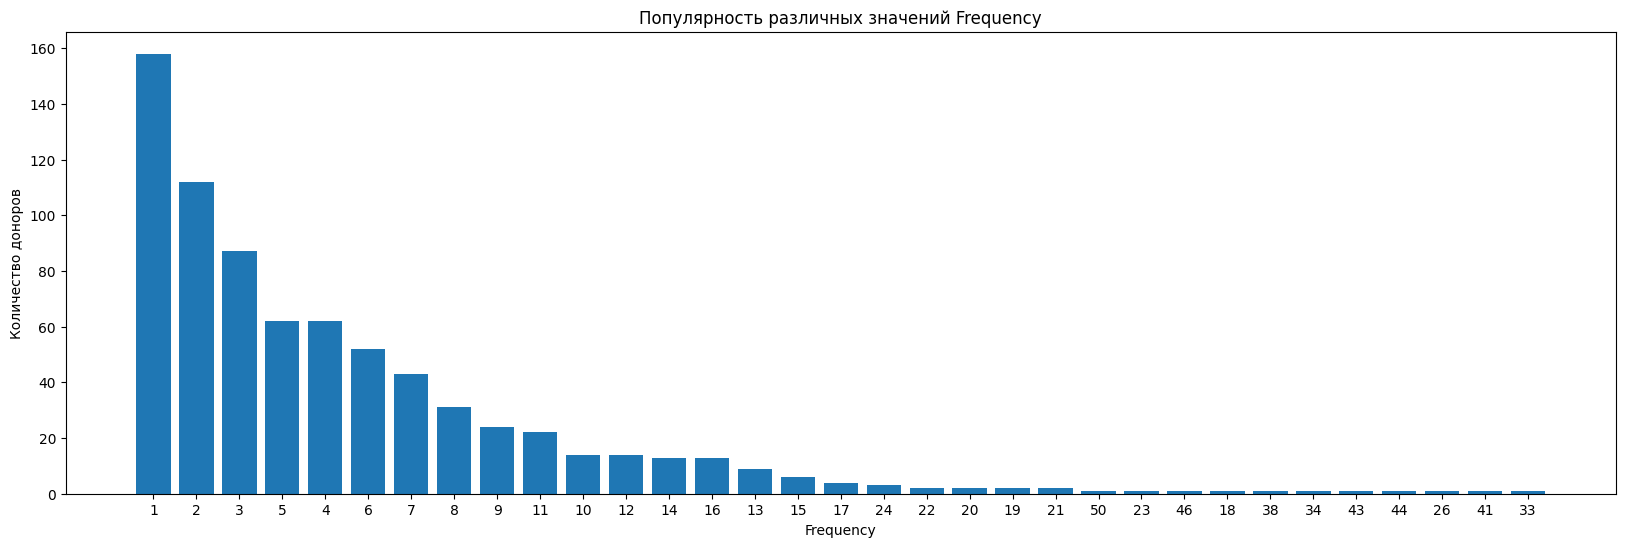

In [32]:
#Определение n популярных категорий и построение bar-графика
fig = plt.subplots(figsize=(20, 6))
hist = data["Frequency"].value_counts()
plt.bar(hist.index.astype(str), hist)
plt.title("Популярность различных значений Frequency")
plt.xlabel("Frequency")
plt.ylabel("Количество доноров")
plt.show()


<p style="font-weight:600;">6. Визуализация взаимосвязанных признаков</p>

In [33]:
# Список колонок датасета
data.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class'], dtype='object')

In [34]:
# Отбор признаков, связанных с историей донорства
feats = ["Recency", "Frequency", "Monetary", "Time"]
feats

['Recency', 'Frequency', 'Monetary', 'Time']

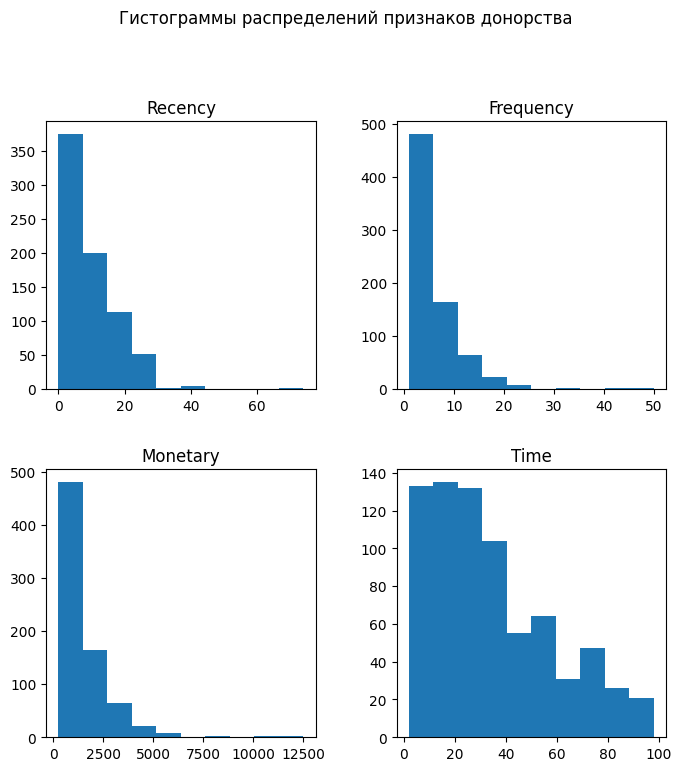

In [35]:
data[feats].hist(figsize=(8, 8), grid=False)
plt.suptitle("Гистограммы распределений признаков донорства", y=1.02)
plt.show()

<span style="font-weight:500; font-size:14px;">Попарные распределения признаков (pairplot)</span>

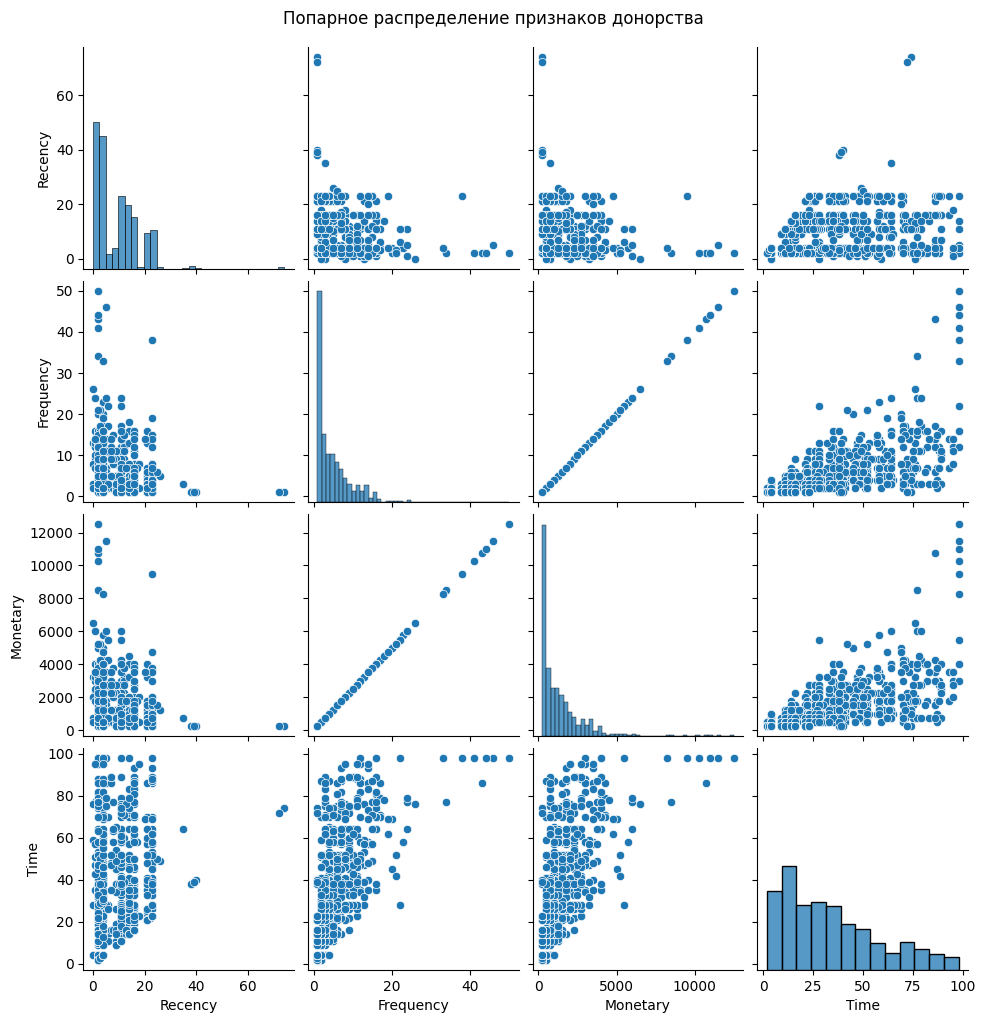

In [36]:
sns.pairplot(data[feats])
plt.suptitle("Попарное распределение признаков донорства", y=1.02)
plt.show()

<span style="font-weight:500; font-size:14px;">Попарные распределения с учётом целевого признака Class</span>

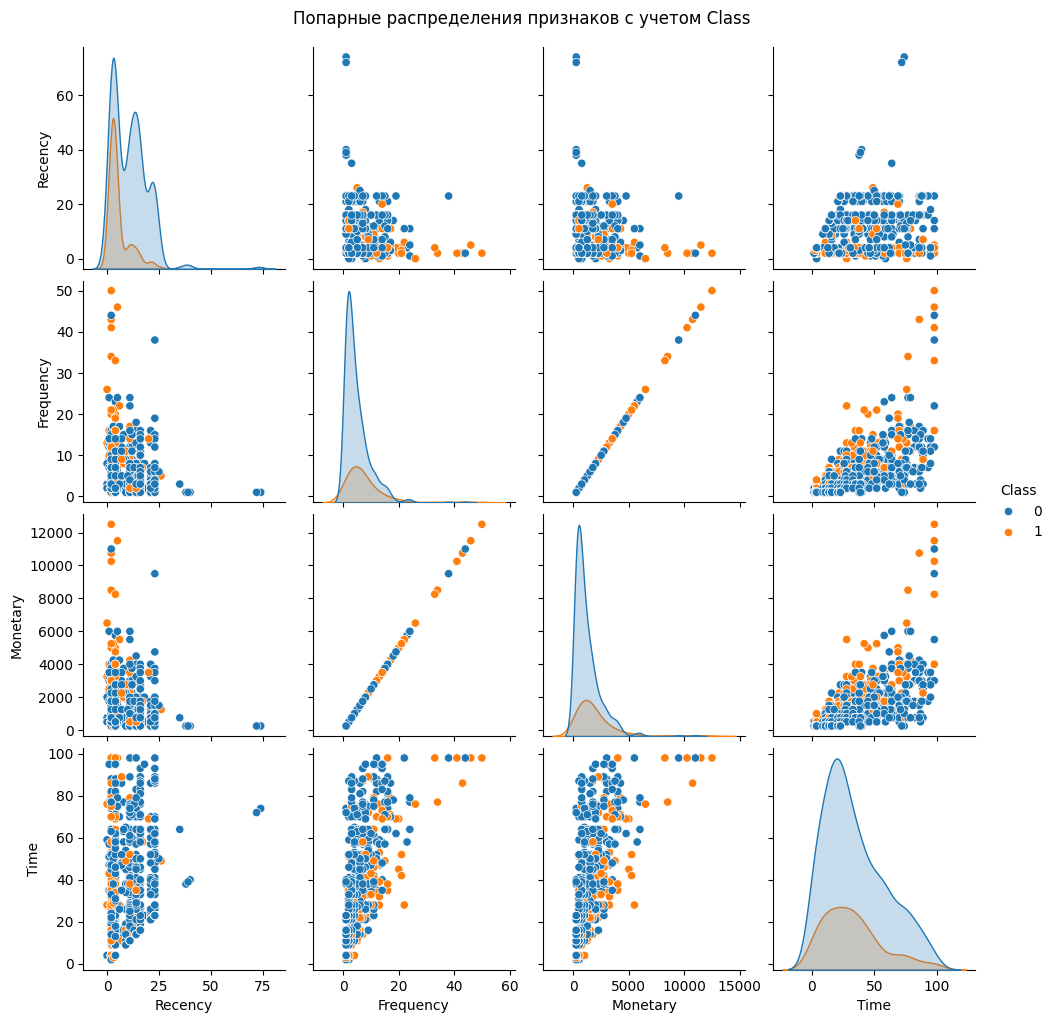

In [37]:
sns.pairplot(data[feats + ["Class"]], hue="Class")
plt.suptitle("Попарные распределения признаков с учетом Class", y=1.02)
plt.show()

<span style="font-weight:500; font-size:14px;">Scatter-график для двух выбранных признаков</span>

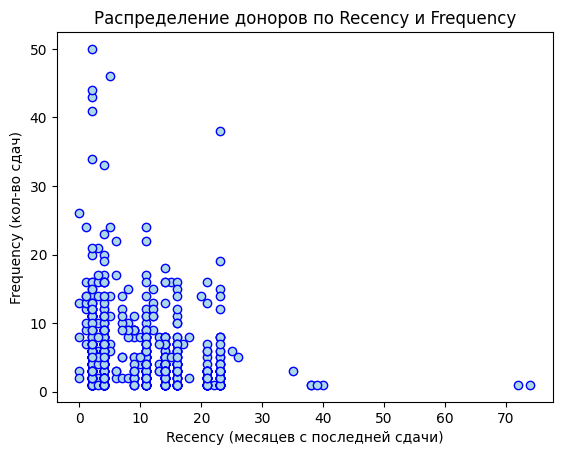

In [38]:
plt.scatter(
    data["Recency"],
    data["Frequency"],
    color="lightblue",
    edgecolors="blue"
)
plt.xlabel("Recency (месяцев с последней сдачи)")
plt.ylabel("Frequency (кол-во сдач)")
plt.title("Распределение доноров по Recency и Frequency")
plt.show()


<span style="font-weight:500; font-size:14px;">Цветовая раскраска по классу</span>

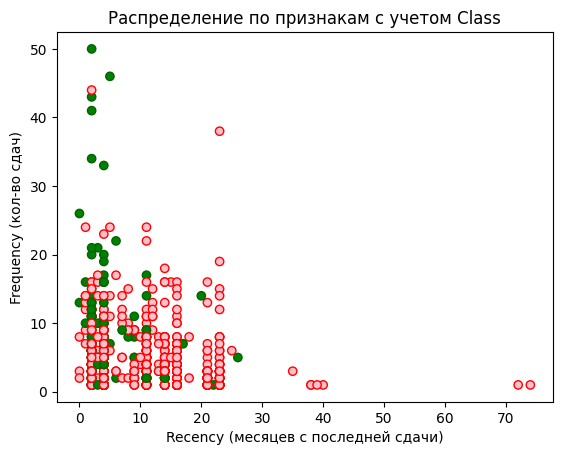

In [39]:
# Цвет в зависимости от Class
c = data["Class"].map({0: "pink", 1: "green"})
edge_c = data["Class"].map({0: "red", 1: "darkgreen"})

plt.scatter(
    data["Recency"], 
    data["Frequency"],
    color=c,
    edgecolors=edge_c
)
plt.xlabel("Recency (месяцев с последней сдачи)")
plt.ylabel("Frequency (кол-во сдач)")
plt.title("Распределение по признакам с учетом Class")
plt.show()


<span style="font-weight:500; font-size:14px;">Разделение данных по классам</span>

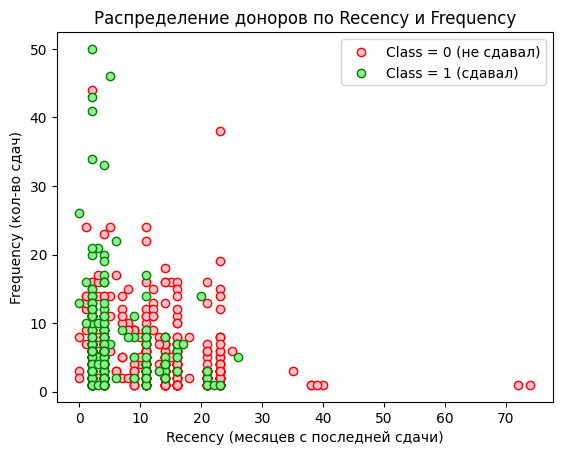

In [40]:
data_no = data[data["Class"] == 0]   # не сдавал
data_yes = data[data["Class"] == 1]  # сдавал

plt.scatter(
    data_no["Recency"], data_no["Frequency"],
    color="pink", edgecolors="red", label="Class = 0 (не сдавал)"
)
plt.scatter(
    data_yes["Recency"], data_yes["Frequency"],
    color="lightgreen", edgecolors="green", label="Class = 1 (сдавал)"
)

plt.xlabel("Recency (месяцев с последней сдачи)")
plt.ylabel("Frequency (кол-во сдач)")
plt.title("Распределение доноров по Recency и Frequency")
plt.legend()
plt.show()


<p style="font-weight:600;">7. Корреляция признаков</p>

In [41]:
#Корреляционный анализ для датасета доноров крови
data.corr(numeric_only=True)


,Recency,Frequency,Monetary,Time,Class
Recency,1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency,-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary,-0.182745,1.000000,1.000000,0.634940,0.218633
Time,0.160618,0.634940,0.634940,1.000000,-0.035854
Class,-0.279869,0.218633,0.218633,-0.035854,1.000000


<span style="font-weight:500; font-size:14px;">Построим heatmap для датасета blood.csv</span>

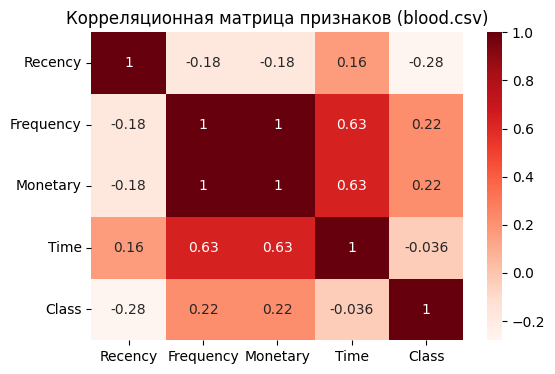

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица корреляций
corr = data.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title("Корреляционная матрица признаков (blood.csv)")
plt.show()


<span style="font-weight:500; font-size:14px;">Удаляем коррелирующие признаки</span>

In [43]:
high_corr = ["Monetary"]   # или "Frequency" — оставить один из пары
data_uncorr = data.drop(high_corr, axis=1)

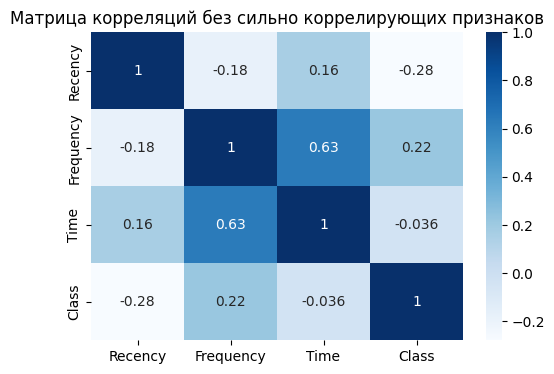

In [44]:
#Проверим новую матрицу:
plt.figure(figsize=(6, 4))
sns.heatmap(data_uncorr.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Матрица корреляций без сильно коррелирующих признаков")
plt.show()